🤖 Welcome to the Multi-Armed Bandit Lab!
We have 3 slot machines. Let's see which one is the best!

🧪 Starting the experiment for 1000 pulls...
The agent is learning by trying machines and getting rewards!
Pull #0: EXPLOITING. Chose Machine 0. Got reward: 3.89. New Q-values: [3.89 0.   0.  ]
Pull #1: EXPLOITING. Chose Machine 0. Got reward: 5.32. New Q-values: [4.6 0.  0. ]
Pull #2: EXPLORING. Chose Machine 0. Got reward: 6.58. New Q-values: [5.26 0.   0.  ]
Pull #3: EXPLORING. Chose Machine 1. Got reward: 10.77. New Q-values: [ 5.26 10.77  0.  ]
Pull #4: EXPLOITING. Chose Machine 1. Got reward: 10.02. New Q-values: [ 5.26 10.39  0.  ]
Pull #5: EXPLOITING. Chose Machine 1. Got reward: 9.57. New Q-values: [ 5.26 10.12  0.  ]
Pull #6: EXPLORING. Chose Machine 2. Got reward: 2.47. New Q-values: [ 5.26 10.12  2.47]
Pull #7: EXPLOITING. Chose Machine 1. Got reward: 9.77. New Q-values: [ 5.26 10.03  2.47]
Pull #8: EXPLOITING. Chose Machine 1. Got reward: 9.46. New Q-values: [5.26 9.92 2.47]


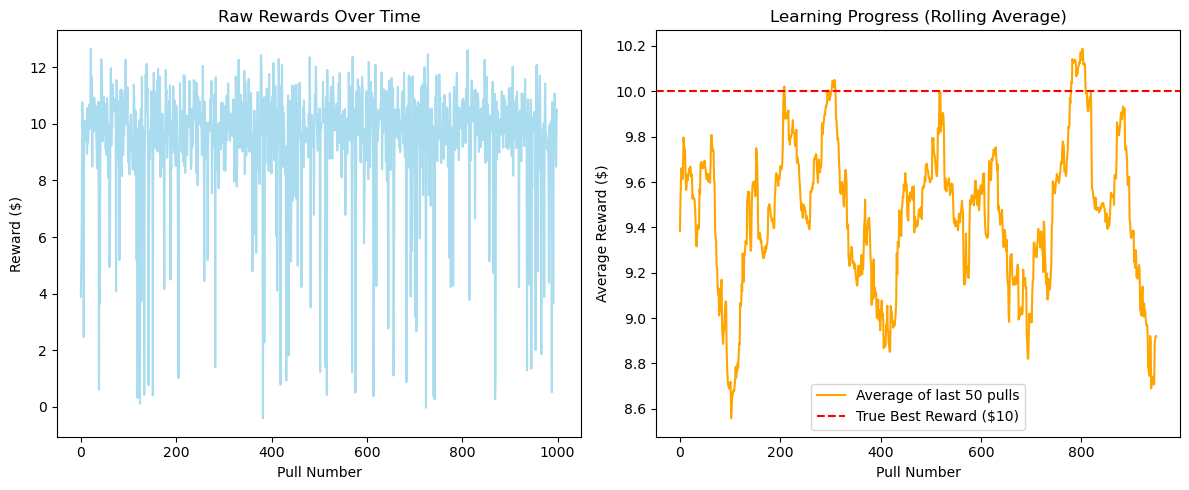


📈 Look at the chart on the right. The orange line shows the agent's performance.
If it goes up and stays near the red dashed line ($10), the agent successfully learned!


In [5]:
# -*- coding: utf-8 -*-
"""
Multi-Armed Bandit Simulation using Epsilon-Greedy Algorithm
Author: [Your Name]
"""
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducible results (like freezing a lottery draw for testing)
np.random.seed(42)

print("🤖 Welcome to the Multi-Armed Bandit Lab!")
print("We have 3 slot machines. Let's see which one is the best!")

# =============================================================================
# STEP 1: SETUP THE BANDITS (The Slot Machines)
# =============================================================================
# These are the TRUE average payouts of each machine. The agent DOES NOT know this.
# Machine 0: $5, Machine 1: $10, Machine 2: $1. So Machine 1 is the best.
bandit_true_means = [5.0, 10.0, 1.0]
num_bandits = len(bandit_true_means)

def pull_bandit(bandit_id):
    """Simulates pulling the lever of a bandit (slot machine).
    
    Args:
        bandit_id (int): Which machine to pull (0, 1, or 2).
        
    Returns:
        float: The reward from the pull. It's the true average + some randomness.
    """
    # The reward is the hidden true mean + a random number (like luck)
    reward = np.random.randn() + bandit_true_means[bandit_id]
    return reward

# =============================================================================
# STEP 2: INITIALIZE THE AGENT'S BRAIN
# =============================================================================
# Q-values: The agent's ESTIMATE of the average reward for each machine.
# It starts with zero knowledge, so all estimates are 0.
Q_values = np.zeros(num_bandits)  # e.g., [0., 0., 0.]

# Counts: How many times we have tried each machine.
# We need this to calculate a running average.
N_counts = np.zeros(num_bandits)  # e.g., [0., 0., 0.]

# Hyperparameter: Epsilon (ε). The exploration probability.
# ε = 0.1 means a 10% chance of exploring (trying a random machine).
epsilon = 0.1

# We will store the reward from every single pull to make a graph later.
history_of_rewards = []

# Let's run our experiment for 1000 pulls.
num_total_pulls = 1000

# =============================================================================
# STEP 3: THE EXPERIMENT - RUN THE EPSILON-GREEDY ALGORITHM
# =============================================================================
print(f"\n🧪 Starting the experiment for {num_total_pulls} pulls...")
print("The agent is learning by trying machines and getting rewards!")

for pull_num in range(num_total_pulls):
    
    # --- THE CORE IDEA: Exploration vs. Exploitation ---
    # With probability `epsilon` (10%): EXPLORE (try a random machine)
    # With probability `1 - epsilon` (90%): EXPLOIT (choose the best known machine)
    if np.random.random() < epsilon:
        # Explore: Choose a random action (machine)
        chosen_bandit = np.random.randint(num_bandits)
        action_type = "EXPLORING"
    else:
        # Exploit: Choose the machine with the highest current Q-value estimate
        chosen_bandit = np.argmax(Q_values)
        action_type = "EXPLOITING"

    # Pull the chosen machine's lever and get a reward
    reward = pull_bandit(chosen_bandit)
    # Save this reward to our history
    history_of_rewards.append(reward)
    
    # Update the count for the chosen machine
    N_counts[chosen_bandit] += 1
    
    # Update our estimate (Q-value) for the chosen machine.
    # This is the formula for a "running average". It's a smart way to update
    # our guess without storing all the old numbers.
    # New Estimate = Old Estimate + (1 / Count) * (Reward - Old Estimate)
    Q_values[chosen_bandit] += (1 / N_counts[chosen_bandit]) * (reward - Q_values[chosen_bandit])
    
    # Optional: Let's print what's happening for the first 10 pulls to understand.
    if pull_num < 10:
        print(f"Pull #{pull_num}: {action_type}. Chose Machine {chosen_bandit}. Got reward: {reward:.2f}. New Q-values: {np.round(Q_values, 2)}")

# =============================================================================
# STEP 4: ANALYZE THE RESULTS
# =============================================================================
print("\n" + "="*50)
print("🔬 EXPERIMENT RESULTS")
print("="*50)

print("\nA. THE TRUTH (What we knew, but the agent didn't):")
for i, true_mean in enumerate(bandit_true_means):
    print(f"  Machine {i}'s True Average Reward: ${true_mean:.2f}")

print("\nB. WHAT THE AGENT LEARNED:")
for i, (learned_mean, count) in enumerate(zip(Q_values, N_counts)):
    print(f"  Machine {i}: Was pulled {int(count)} times. Learned Average: ${learned_mean:.2f}")

# Who did the agent think was the best?
agents_best_guess = np.argmax(Q_values)
print(f"\nC. CONCLUSION:")
print(f"   The agent believes Machine #{agents_best_guess} is the best.")
if agents_best_guess == np.argmax(bandit_true_means):
    print("   ✅ SUCCESS! The agent found the truly best machine!")
else:
    print("   ❌ The agent was tricked! It chose the wrong machine.")

# =============================================================================
# STEP 5: VISUALIZE THE LEARNING PROCESS
# =============================================================================
# Create a figure with two plots
plt.figure(figsize=(12, 5))

# Plot 1: The reward from every single pull
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
plt.plot(history_of_rewards, alpha=0.7, color='skyblue', label='Reward per Pull')
plt.title('Raw Rewards Over Time')
plt.xlabel('Pull Number')
plt.ylabel('Reward ($)')
# At first, rewards are all over the place. Later, they should cluster around $10.

# Plot 2: A rolling average to see the trend clearly
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
window_size = 50 # Calculate the average of every 50 pulls
rolling_avg = [np.mean(history_of_rewards[i-window_size:i]) for i in range(window_size, len(history_of_rewards))]
plt.plot(rolling_avg, color='orange', label=f'Average of last {window_size} pulls')
plt.title('Learning Progress (Rolling Average)')
plt.xlabel('Pull Number')
plt.ylabel('Average Reward ($)')
# This line should start low and then climb up and stay high, proving the agent learned!
plt.axhline(y=max(bandit_true_means), color='r', linestyle='--', label='True Best Reward ($10)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

print("\n📈 Look at the chart on the right. The orange line shows the agent's performance.")
print("If it goes up and stays near the red dashed line ($10), the agent successfully learned!")